<a href="https://colab.research.google.com/github/gui-ferr/Segunda_Fase_PS_2023/blob/main/PS_FeadevQuant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=blue|blue|red>Case Avançado Quant</font>

Estamos muito felizes pela sua escolha com o case de finanças quantitativas. Esperamos que você aprenda bastante conosco.  

Caso não tenha lido as orientações no nosso [repositório do github](https://github.com/fea-dev-usp/Segunda_Fase_PS_2023), o faça imediatamente! É fundamental para teu bom desempenho no case.

Rode a célula abaixo e entre em contato com um de nossos monitores no WhatsApp em caso de dúvida:

In [1]:
import random
lista_contatos = ["Alice Saraiva (+55 79 9874-7424)",
                  "Ana Cristina (+55 11 9 7893-7687)",
                  "Julio Manuel (+55 13 9 9778-2003)",
                  "Rafael Macedo (+55 11 9 5848-0591)"]

print(f'Entrar em contato com {lista_contatos[random.randint(0, 3)]}.')

Entrar em contato com Ana Cristina (+55 11 9 7893-7687).


<br><hr>

## **Parte I**

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Usando a biblioteca Yahoo Finance, importe as séries temporais do preço de fechamento ajustado - de 01/01/2018 a 31/12/2022 - das ações da Vale (VALE3.SA), Petrobras (PETR4.SA), Magalu (MGLU3.SA), Bradesco (BBDC4.SA) e Itaú (ITUB4.SA). Deixe as cinco colunas em um mesmo DataFrame.

In [3]:
dfFechamentos = yf.download("VALE3.SA PETR4.SA MGLU3.SA BBDC4.SA ITUB4.SA", start="2018-01-01", end="2022-12-31")
dfFechamentos = dfFechamentos.drop(dfFechamentos.columns[[list(range(5,30))]],axis = 1)
dfFechamentos

[*********************100%***********************]  5 of 5 completed


/usr/local/lib/python3.9/dist-packages/pandas/core/indexes/multi.py:2129: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_codes = [level_codes[key] for level_codes in self.codes]


Adj Close                                           
             BBDC4.SA   ITUB4.SA  MGLU3.SA   PETR4.SA   VALE3.SA
Date                                                            
2018-01-02  15.310576  23.359274  2.390916   7.292881  28.455336
2018-01-03  15.380969  23.518974  2.360765   7.358980  28.284828
2018-01-04  15.633329  24.008728  2.417448   7.372199  28.400770
2018-01-05  15.721877  24.077938  2.369811   7.416266  28.844114
2018-01-08  15.717450  23.998087  2.370111   7.504397  29.485243
...               ...        ...       ...        ...        ...
2022-12-23  14.472077  24.834997  2.680000  25.120001  84.465065
2022-12-26  14.127958  24.342043  2.660000  24.940001  85.238083
2022-12-27  14.061047  24.204014  2.520000  25.110001  87.273392
2022-12-28  14.491196  24.696972  2.690000  24.799999  87.077682
2022-12-29  14.481636  24.647675  2.740000  24.500000  86.970047

[1239 rows x 5 columns]

2) Faça um gráfico de linha para visualizar as cinco séries temporais, com todas elas na mesma figura. Assegure que cada linha corresponde a uma ação e que as linhas estejam legendadas.

<Axes: xlabel='Date'>

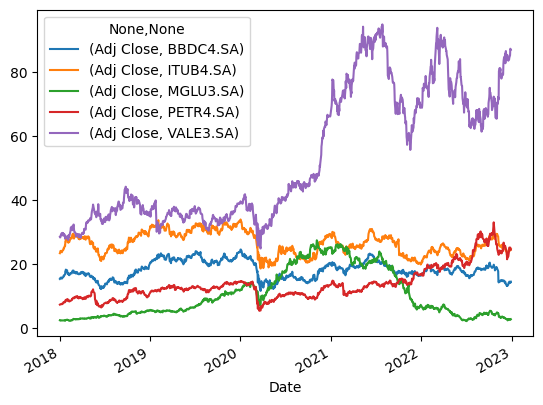

In [4]:
dfFechamentos.plot()

3) Faça um gráfico de linha para visualizar o desvio padrão móvel de 20 dias das cinco séries temporais, no mesmo padrão de visualização da questão 2). Interprete o desvio padrão móvel de 20 dias (i.e., tente explicar o que ele significa). 

In [5]:
#Pra usar a função .stdev
import statistics

<Axes: >

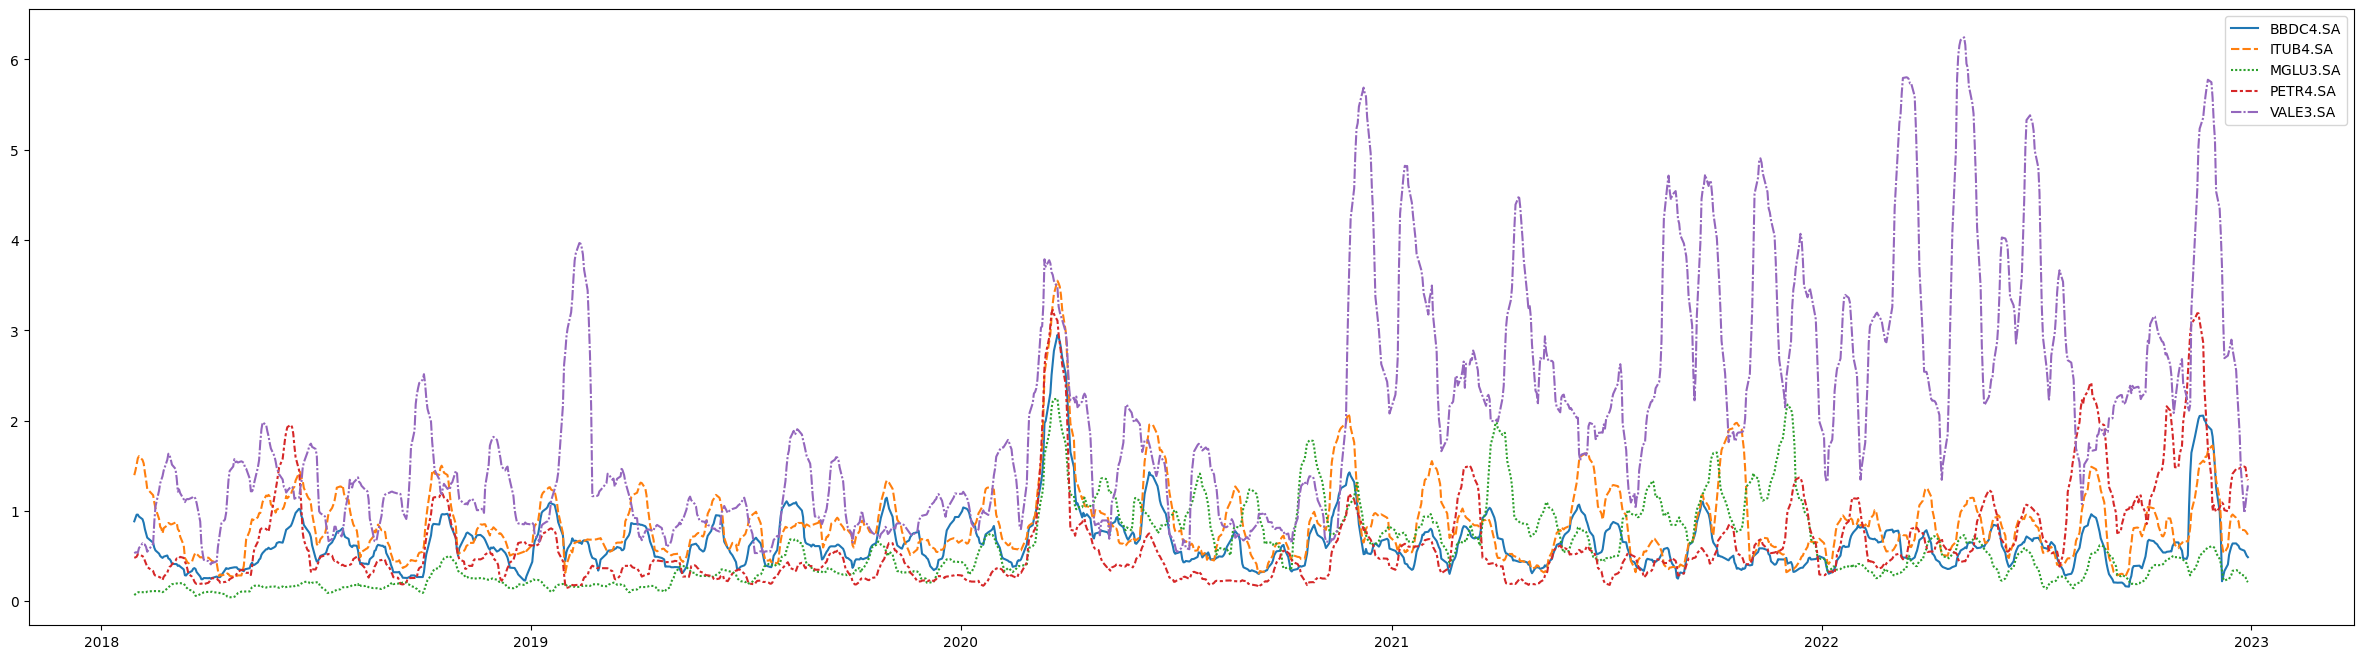

In [6]:
indexTicker = 0
listaDeTickers = ['BBDC4.SA','ITUB4.SA','MGLU3.SA','PETR4.SA','VALE3.SA']
dates = list(dfFechamentos.index.values)
dates = dates[19:]                                                 #Com menos de 20 elementos, n faz sentido uma média de 20 dias, portanto tirei os primeiros 20 fechamentos

dfDesvPad = pd.DataFrame(columns=listaDeTickers, index = dates)    #Isso cria um DataFrame novo e já coloca a coluna das datas e o nome dos tickers

while indexTicker < 5:

  #Esse primeiro loop serve pra trocar entre as colunas do dataframe original

  n = 20
  listaSeriesTicker = list(dfFechamentos.iloc[:, indexTicker])
  listaDesvPad = []

  while n <= len(list(dfFechamentos.index.values)):

    #E esse pra fazer os cálculos e montar numa lista que vai ser colocada 
    # no novo dataframe

    proximoitem = statistics.stdev(listaSeriesTicker[n-20:n])
    listaDesvPad.append(proximoitem)
    n += 1

  #Colocando a lista finalizada no DataFrame:
  dfDesvPad[listaDeTickers[indexTicker]] = listaDesvPad
  indexTicker += 1


plt.figure(figsize=(30,8))
sns.lineplot(dfDesvPad)

O desvio padrão móvel de 20 dias indica, **em números absolutos**, a volatilidade do preço da ação em dado mês.

Por serem números absolutos ( proporcionais ao preço da ação ), essa métrica não é útil para comparar a volatilidade de uma ação com a de outra, já que ela será sempre atrelada ao preço da ação.

Portanto, esse gráfico não significa que a Vale necessariamente possui uma ação mais volátil que as outras, mas sim que ela provavelmente teve um preço maior a partir do final de 2020, o que pode ser constatado no gráfico do Ex. 2

4) Faça um gráfico contendo o preço de fechamento das ações da Petrobras, com as Bandas de Bollinger (dois desvios para cima e dois para baixo). Tente interpretar.

<Axes: >

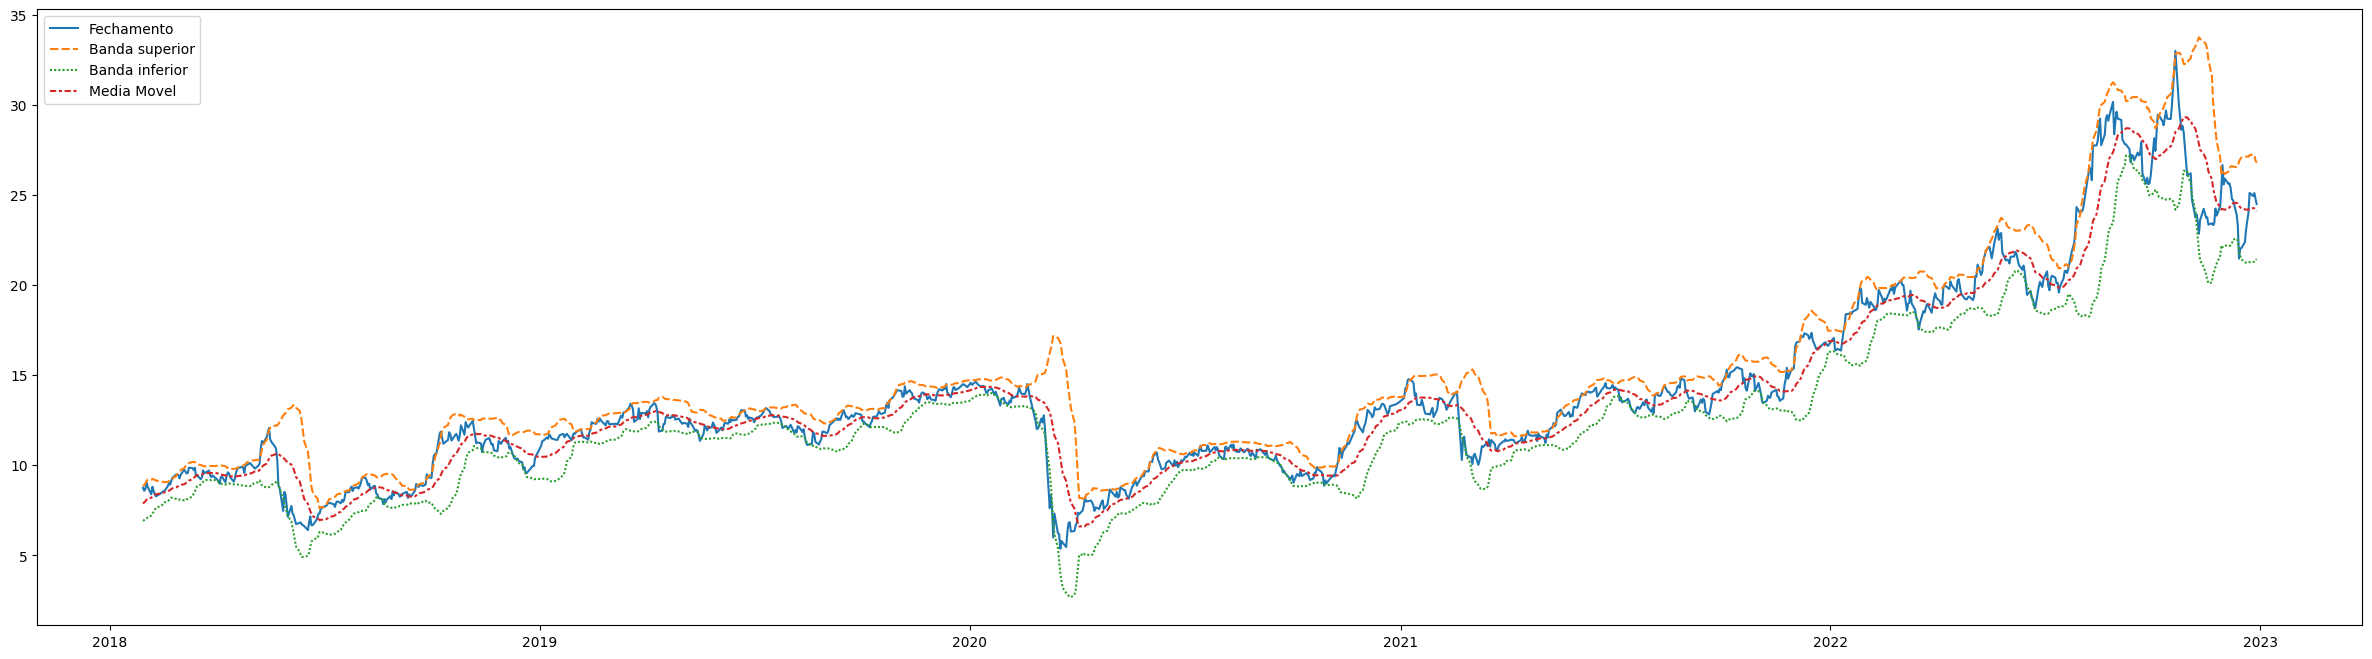

In [7]:
dates = list(dfFechamentos.index.values)
#Mesma coisa da questão 3: cortei as primeiras 20 datas por ser móvel de 20 dias
dates = dates[19:]

#Criando o Dataframe
dfBollinger = pd.DataFrame(columns=['Fechamento','Banda superior','Banda inferior','Media Movel'], index = dates)
listaMediaMovelPetr = []
n = 20


listaFechamentosPetr = list(dfFechamentos.iloc[:,3])
listaDesvPadPetr = list(dfDesvPad.iloc[:,3])

while n <= len(list(dfFechamentos.index.values)):

  #Esse loop cria a lista das médias móveis

  proximoitem = statistics.mean(listaFechamentosPetr[n-20:n])
  listaMediaMovelPetr.append(proximoitem)
  n += 1

#Cortando as primeiras 20:
listaFechamentosPetr = listaFechamentosPetr[19:]

listaBandaSup = []
listaBandaInf = []

n = 0

while n < len(listaFechamentosPetr):

  #E esse cria as bandas

  proximoitem = listaMediaMovelPetr[n] + 2*listaDesvPadPetr[n]
  listaBandaSup.append(proximoitem)
  proximoitem = listaMediaMovelPetr[n] - 2*listaDesvPadPetr[n]
  listaBandaInf.append(proximoitem)
  n += 1

#Encaixando no Dataframe:
dfBollinger['Fechamento'] = listaFechamentosPetr
dfBollinger['Banda superior'] = listaBandaSup
dfBollinger['Banda inferior'] = listaBandaInf
dfBollinger['Media Movel'] = listaMediaMovelPetr

plt.figure(figsize=(30,8))
sns.lineplot(dfBollinger)

As Bandas de Bollinger são uma ferramenta de análise de preços de ativos. Elas podem indicar se um ativo está super ou subvalorizado.

No caso da PETR4, existem períodos de subvalorização (como na metade de 2018, em março de 2020 no final de 2022), períodos de supervalorização ( final de 2018, final de 2021 e metade de 2022) e períodos de bastante equilíbrio ( 2019 e 2021). 

5) Faça um novo DataFrame com os retornos percentuais de cada ação no período especificado.

In [8]:
dates = list(dfFechamentos.index.values)
dfRetornos = pd.DataFrame(columns=listaDeTickers, index = dates)

indexTicker = 0
while indexTicker < 5:

  #Esse loop troca entre as colunas do dataframe original

  n = 0
  listaSeriesTicker = list(dfFechamentos.iloc[:, indexTicker])
  listaRetornos = []

  while n < len(list(dfFechamentos.index.values)):

    #(N-ésimo / Primeiro) - 1 = Retorno em porcentagem

    proximoitem = (listaSeriesTicker[n]/listaSeriesTicker[0]) - 1
    listaRetornos.append(proximoitem)
    n += 1
  
  #Colocando a lista finalizada no DataFrame:
  dfRetornos[listaDeTickers[indexTicker]] = listaRetornos
  indexTicker += 1

dfRetornos

,BBDC4.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA
2018-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2018-01-03,0.004598,0.006837,-0.012611,0.009064,-0.005992
2018-01-04,0.021080,0.027803,0.011097,0.010876,-0.001918
2018-01-05,0.026864,0.030766,-0.008827,0.016919,0.013663
2018-01-08,0.026575,0.027347,-0.008702,0.029003,0.036194
...,...,...,...,...,...
2022-12-23,-0.054766,0.063175,0.120909,2.444455,1.968338
2022-12-26,-0.077242,0.042072,0.112544,2.419774,1.995504
2022-12-27,-0.081612,0.036163,0.053989,2.443084,2.067031
2022-12-28,-0.053517,0.057266,0.125092,2.400577,2.060153


6) Faça um gráfico de linha para visualizar os retornos de todas as ações, no mesmo padrão de visualização da questão 2.

<Axes: >

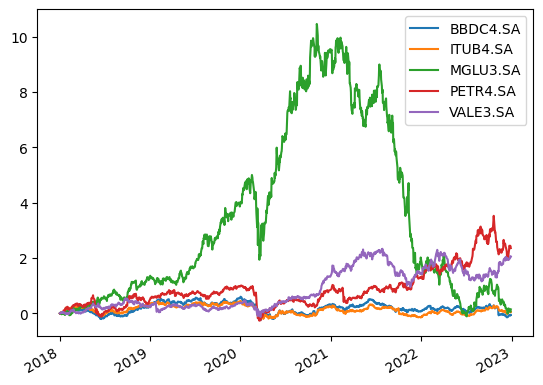

In [9]:
dfRetornos.plot()

7) Faça um gráfico de dispersão dos retornos do Bradesco e do Itaú. Tente interpetar.

<Axes: xlabel='Retorno BBDC4', ylabel='Retorno ITUB4'>

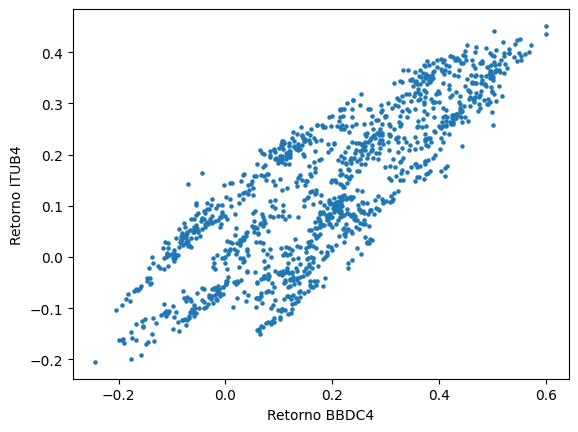

In [10]:
dfDispersao = pd.DataFrame(columns=['Retorno BBDC4', 'Retorno ITUB4'])
dfDispersao['Retorno BBDC4'] = list(dfRetornos.iloc[:,0])
dfDispersao['Retorno ITUB4'] = list(dfRetornos.iloc[:,1])

dfDispersao.plot.scatter(x = 'Retorno BBDC4', y = 'Retorno ITUB4', s = 5)

O Bradesco e o Itaú são os maiores bancos do Brasil. Por isso, eles são bastante similares no que tange ao porte e ao setor. Por esse motivo, ambas as empresas e suas respectivas ações são afetadas por muitas das mesmas variáveis.

Isso explica a forte correlação linear entre os retornos dos dois bancos.

8) Calcule a matriz de correlação de todos os retornos e visualize usando um mapa de calor (dê uma olhada na biblioteca Seaborn). Tente interpetar.

<Axes: >

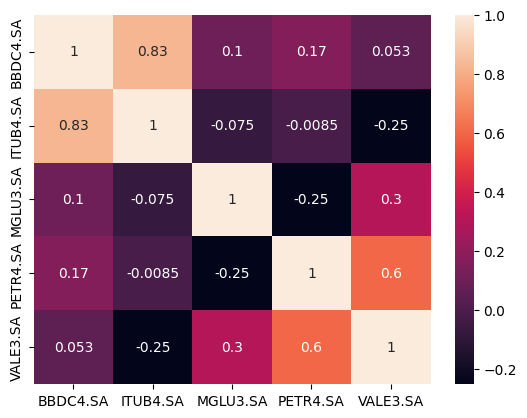

In [11]:
sns.heatmap(dfRetornos.corr(),xticklabels=True, yticklabels=True, annot=True)

O Itaú e o Bradesco possuem uma forte correlação linear, o que comprova o ponto feito na questão anterior. 

Além disso, também é possível identificar uma correlação entre a Petrobras e a Vale, a qual provavelmente ocorre pelo mesmo motivo da correlação entre os bancos: ambas são empresas do mesmo setor (extração mineral) e de porte muito grande. Assim, elas estão suscetíveis a variáveis similares.

9) O que podemos falar sobre a performance das ações em 2021? Há alguma que performou melhor que as outras? E pior? Justifique. 

Obs.: sinta-se à vontade para explorar os dados e conseguir responder a essa questão. Recomenda-se que sejam feitos gráficos mais específicos para podermos analisar a performance das ações (não é necessário calcular nenhuma métrica ou entrar em muito detalhe, siga a sua intuição).

10) O que podemos falar sobre o risco das ações em 2020? Há alguma que se mostrou mais arriscada que as outras? E menos? Justifique. 

Obs.: sinta-se à vontade para explorar os dados e conseguir responder a essa questão. Recomenda-se que sejam feitos gráficos mais específicos para podermos analisar a performance das ações (não é necessário calcular nenhuma métrica ou entrar em muito detalhe, siga a sua intuição).


<br><hr>

## **Parte II**

1) Escolha um dos ativos extraídos e faça um histograma dos retornos logarítmicos. O gráfico sugere alguma distribuição para os retornos? 

In [12]:
#Pra usar a função .log10
import math

<Axes: ylabel='Count'>

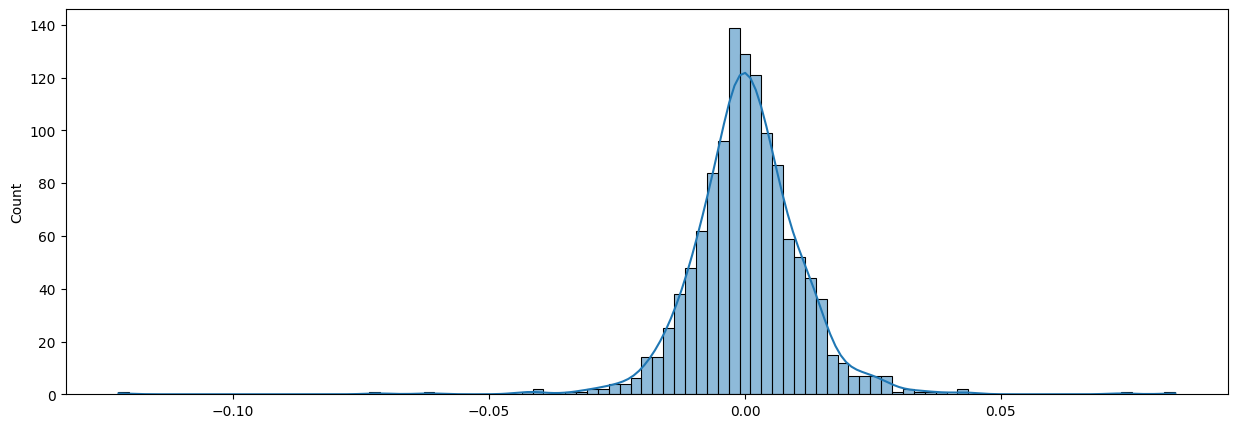

In [13]:
#Selecionei a Vale
listaSeriesTicker = list(dfFechamentos.iloc[:, 4])
listaRetornoDiarioLog = []
n=0

while n < len(list(dfFechamentos.index.values)):

  #(N-ésimo / N-ésimo - 1) = Retorno em porcentagem de um dia pro outro, dado que o dia abriu em 100% (1)

  proximoitem = (listaSeriesTicker[n]/listaSeriesTicker[n-1])


  proximoitem = math.log10(proximoitem)
  listaRetornoDiarioLog.append(proximoitem)
  n += 1

#Tirar o primeiro item, já que com o n-1, ele fica errado
listaRetornoDiarioLog.pop(0)

plt.figure(figsize = (15,5))
sns.histplot(x=listaRetornoDiarioLog, kde = True)

A curva da distribuição dos retornos logarítmicos se assemelha a uma curva normal.

2) Faça um teste de hipótese para verificarmos se a distribuição dos retornos logarítmicos do ativo escolhido no exercício 1 é normal. Com base no p-valor, interprete. 

Obs.: use um nível de significância de 5%.

In [14]:
from scipy.stats import chisquare, norm
from scipy.stats import shapiro

In [15]:
#Hipótese nula: a distribuição dos retornos não segue uma distribuição normal -> (p > 0,05)
#Hipótese alternativa: a distribuição dos retornos segue uma distribuição normal -> (p < 0,05)

#Rachei a cabeça pra tentar fazer um teste Qui Quadrado mas não consegui...
#Mesmo pesquisando nas bibliotecas, nao consegui desvendar o que é esse
#.pdf(np.linspace())


#Segue minha tentativa:

#mi, sigma = norm.fit(listaRetornoDiarioLog)
#
#esperado = norm(mi, sigma).pdf(np.linspace(0, 100, 100)
#
#observado = np.histogram(listaRetornoDiarioLog, bins=100)
#
#stat, p = chisquare(observado, f_exp=esperado)
#
#print(p)

In [16]:
#Pra não deixar vazio, consegui fazer funcionar outro teste de normalidade,
#o "Teste de Shapiro–Wilk", mas admito que não sei como ele funciona.

stat, p = shapiro(listaRetornoDiarioLog)

print(p)

1.4572972628793785e-28


O p-valor é aproximadamente 1,4 x 10^-28, ou seja, é **praticamente** **impossível** que a distribuição dos retornos logarítmicos da Vale ***não*** siga uma distribuição normal. 

3) Calcule o Máximo Drawdown das ações extraídas. Interprete, comparando os valores.

In [17]:
#Criando o DF. Coloquei a posição da mínima pra efeitos de análise.
dfDrawdown = pd.DataFrame(columns=listaDeTickers, index = ['Preço mínimo', 'Preço máximo', 'Posição da mínima', 'Máximo drawdown'])

indexTicker = 0
while indexTicker < 5:

  #No mesmo espírito das outras exercícios, a variável "indexTicker"
  #Apenas troca entre as colunas do Dataframe, da 0 à 4

  listaSeriesTicker = list(dfFechamentos.iloc[:, indexTicker])
  
  precoMin = min(listaSeriesTicker)

  #Pra descobrir o máximo preço ANTES do mínimo, achei a posição do mínimo na série,
  # e procurei o máximo preço até a posição do mínimo 
  posicaoMin = listaSeriesTicker.index(precoMin)
  precoMax = max(listaSeriesTicker[0:posicaoMin])
  
  maximoDrawdown = (precoMin - precoMax)/precoMax

  dfDrawdown.iloc[0, indexTicker] = precoMin
  dfDrawdown.iloc[1, indexTicker] = precoMax
  dfDrawdown.iloc[2, indexTicker] = posicaoMin
  dfDrawdown.iloc[3, indexTicker] = maximoDrawdown

  indexTicker += 1

dfDrawdown

,BBDC4.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Preço mínimo,11.585314,18.575983,2.13,5.362339,24.84156
Preço máximo,24.515457,33.906425,27.401571,14.633626,44.142471
Posição da mínima,549,549,1114,546,549
Máximo drawdown,-0.527428,-0.45214,-0.922267,-0.633561,-0.437241


O máximo drawdown é uma medida de risco de que indica o máximo que uma ação já desvalorizou no período.

A MGLU teve um máximo drawdown de -92%: bem maior que as outras ações, em comparação, o que pode indicar que a Magazineluiza é uma empresa arriscada para se investir.

As outras ações tiveram um máximo drawdown semelhante. Depois de comparar o  quando ocorreram as respectivas mínimas, se percebe que elas aconteceram no mesmo período de crash da bolsa de Março/Abril de 2020. 

Isso pode justificar o drawdown relativamente alto dessas ações e o porquê de elas serem semelhantes.

4) Gere pesos aleatórios para a composição de um portfólio com os cinco ativos extraídos. Guarde os pesos em alguma variável (pode ser uma lista, array, etc.).

Obs.: os pesos de um portfólio com cinco ativos será uma "coleção" de cinco números que tomam valores entre 0 e 1 e - se somarmos todos eles - o resultado **deve** ser 1.

In [18]:
import random as ran

In [19]:
portfolio = [ran.random() for i in range(0,5)]
soma = sum(portfolio)

#Pesquisando sobre como fazer a soma de n números 0 <= x <= 1 resultar em 1,
# descobri sobre isso:

for i in range(0,5):
  portfolio[i]=portfolio[i]/soma          

#Faz sentido, já que no fundo, vc só está dividindo a soma dos números pela 
#própria soma deles, então o resultado vai necessariamente ser 1

#Obs: a soma pode não ser exatamente 1 por causa de 
#floating point precision error, penso eu...

print(portfolio)
print("A soma dos cinco ativos é:", sum(portfolio))

[0.31548892871242695, 0.0019646741870752936, 0.059265703540542045, 0.2271855421147046, 0.3960951514452512]
A soma dos cinco ativos é: 1.0


5) Usando os pesos gerados na questão 4), calcule o retorno diário esperado e o desvio-padrão (também diário) do portfólio.

Obs.: pesquise como calcular ambos os valores.

6) Gere outro portfólio (com outros pesos), calcule seu retorno e o seu desvio-padrão e compare com os valores encontrados em 5), usando a visão risco X retorno.

<br><hr>

## **Questão Extra**

Usando a Teoria Moderna do Portfólio, faça um gráfico contendo várias carteiras possíveis e evidencie a fronteira eficiente. 